<a href="https://colab.research.google.com/github/naufalahnaf17/tensorflow_01_regression/blob/main/00_tensorflow_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengenalan awal tentang Tensorflow

### Ada beberapa yang bakal kita lakukan disini yaitu :
- kita akan menggunakan tensorflow -> untuk membuat model
- lalu kita juga akan menggunakan matplotlib -> untuk memvisualisasikan data yang kita gunakan
- setelah itu kita juga akan membuat model pertama kita menggunakan tensorflow
- lalu kita juga akan mengevaluasi model yang telah dibuat dengan tuning yang berbeda

### Algoritma yang kita akan gunakan yaitu Regression dan Evaluasi yang akan kita gunakan adalah MAE (Mean Absolute Error)

### Pertama tama kita akan melakukan import tensorflow dan matplotlib terlebih dahulu

In [2]:
# Import Tensorflow
import tensorflow as tf
# Import Matplotlib
import matplotlib.pyplot as plt

In [3]:
# Kita akan mengecek versi tensorflow terlebih dahulu, dengan begitu kita bisa tau versi tensorflow yang digunakan
print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.15.0


### Selanjutnya kita akan membuat data yang akan kita training, kali ini kita akan melakukan dengan data sederhana terlebih dahulu

In [4]:
# Kita akan membuat data X dan y
# Data X adalah data dari -100 hingga 100 dengan jarak masing masing adalah 4

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [5]:
# Selanjutnya kita akan membuat data y
# Data y adalah data dari range X namun kita tambahkan 10
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

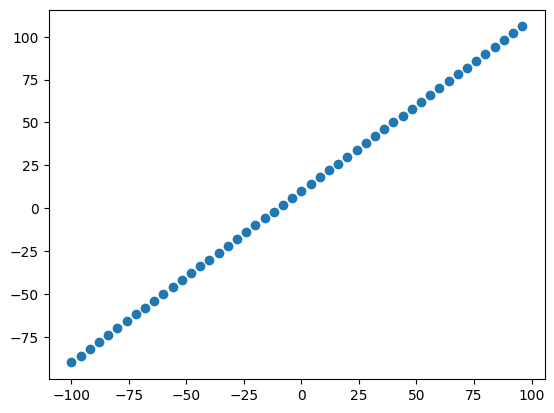

In [6]:
# Mari kita visualisasikan data X dan y secara sederhana terlebih dahulu
plt.scatter(X,y)

### Selanjutnya mari kita membuat model sederhana dengan tensorflow

Step by step untuk membuat model sederhana dengan tensorflow

1. Create Model -> define input dan output
2. Compile Model -> define loss function (loss dalam artian kita harus tau untuk evaluasi model yang telah kita buat seberapa bagus, dan juga kita bisa membuat evaluasi tentang model yang dibuat)
3. Fitting Model -> letting model find pattern dari X dan y (features dan labels)

In [7]:
X.ndim,y.ndim

(1, 1)

In [8]:
# Step 1 Create Model
# Untuk saat ini kita akan membuat model sederhana dengan 1 hidden layer tanpa activation
# Untuk model yang akan kita buat untuk saat ini adalah tf.keras.Sequential

# Untuk saat ini kita akan menggunakan set seed agar pelatihan model dan pengulangan terjadi secara sama
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Step 2 Compile Model
# Kita akan compile model sederhana yang kita buat dengan Loss dan Metrics MAE dan untuk optimizer kita akan menggunakan SGD (stochastic gradient descent)
model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics="mae")

# Step 3 Fitting Model
# Pada saat kita fit model seharusnya syntax nya seperti ini
# model.fit(X,y,epochs=5)
# Namun kita harus sedikit memodifikasi karna ndim x dan y hanya 1 sedangkan minimal ndim seharusnya ada 2
# Epochs adalah lap seperti dalam balapan -> jadi model yang kita buat ini akan melakukan 5 putaran untuk mempelajari data yang ada
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
2/2 [==============================] - 1s 23ms/step - loss: 95.1866 - mae: 95.1866
Epoch 2/5
2/2 [==============================] - 0s 18ms/step - loss: 45.5070 - mae: 45.5070
Epoch 3/5
2/2 [==============================] - 0s 13ms/step - loss: 10.0267 - mae: 10.0267
Epoch 4/5
2/2 [==============================] - 0s 10ms/step - loss: 11.1885 - mae: 11.1885
Epoch 5/5
2/2 [==============================] - 0s 11ms/step - loss: 10.5847 - mae: 10.5847


In [9]:
# Melakukan predict
# Sebelum itu mari kita lihat data X dan y terlebih dahulu
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [10]:
# Bisa dilihat dari data diatas masing masing kita bisa langsung tahu bahwa dari angka n ke angka ke depan adalah 4
# Jadi kalau kita melakukan prediksi angka 100, maka harusnya y nya adalah 110
model.predict([100])

1/1 [==============================] - 0s 308ms/step


array([[81.97326]], dtype=float32)

In [11]:
# Ternyata model nya masih terlalu buruk karna seharusnya pada saat kita memasukan angka 100 jawaban yang seharusnya adalah 110

### Model pertama sudah berhasil dibuat, namun hasilnya sedikit mengecewakan karna jauh dari jawaban yang seharusnya

pada section kali ini mari kita sedikit evaluasi model yang telah kita buat, ada beberapa cara untuk mengevaluasi model yang telah kita buat

Creating Model (Step 1) :
- Kita bisa menambahkan layer dan menaikan number dari layer itu sendiri (neuron) contoh -> **tf.keras.layers.Dense(100,activation="relu")**

Compile Model (Step 2) :
- Kita juga bisa menggunakan optimizer berbeda dan menambahkan learning rate dari optimizer function contoh : -> model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics="mae")

Fitting Model (Step 3) :
- Kita juga bisa menambahkan lap (epochs) pada model yang kita buat, walaupun lebih lama dalam melakukan training bisa jadi memungkinkan bahwa dengan menaikan epochs kita bisa mendapatkan hasil yang lebih maksimal
- Atau bisa juga dengan menambahkan data X dan y

In [12]:
# Mari kita buat ulang model seperti diatas
# Pada percobaan pertama kita akan menambahkan Epochs terlebih dahulu menjadi 100

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 42ms/step - loss: 63.1410 - mae: 63.1410
Epoch 2/100
2/2 [==============================] - 0s 19ms/step - loss: 18.1679 - mae: 18.1679
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 16.1293 - mae: 16.1293
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 10.1163 - mae: 10.1163
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 15.5085 - mae: 15.5085
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 11.8153 - mae: 11.8153
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 9.3217 - mae: 9.3217
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.9608 - mae: 11.9608
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 12.7217 - mae: 12.7217
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 10.0101 - mae: 10.0101
Epoch 11/100
2/2 [==============================] -

In [13]:
# Mari kita lihat terlebih dahulu X dan y
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [14]:
# Seharusnya saat kita memasukan angka 100, jawaban yang benar adalah 110, mari kita coba
model.predict([100])

1/1 [==============================] - 0s 137ms/step


array([[90.18146]], dtype=float32)

In [15]:
# Masih jauh dari harapan, namun setidaknya membaik, maka dari itu mari kita coba membuat model dengan hidden layer yang lebih banyak dan kita buat juga dengan activation='relu'
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 26ms/step - loss: 43.4491 - mae: 43.4491
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 14.0935 - mae: 14.0935
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 14.8922 - mae: 14.8922
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 13.2241 - mae: 13.2241
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 12.0173 - mae: 12.0173
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 16.4132 - mae: 16.4132
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 10.5503 - mae: 10.5503
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 14.9696 - mae: 14.9696
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 21.4918 - mae: 21.4918
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 11.2746 - mae: 11.2746
Epoch 11/100
2/2 [==============================]

In [16]:
# Mari kita coba predict
model.predict([100])

# Ternyata hasilnya malah lebih buruk, mari kita coba gunakan activation=None

1/1 [==============================] - 0s 73ms/step


array([[76.94968]], dtype=float32)

In [17]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 55.5456 - mae: 55.5456
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 31.4820 - mae: 31.4820
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 44.6282 - mae: 44.6282
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 22.7752 - mae: 22.7752
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 24.1215 - mae: 24.1215
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 22.8141 - mae: 22.8141
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0601 - mae: 11.0601
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 14.0556 - mae: 14.0556
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 35.9298 - mae: 35.9298
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 19.4986 - mae: 19.4986
Epoch 11/100
2/2 [==============================] - 0s 8ms

In [18]:
# Mari kita coba predict (saat input 100 output seharusnya adalah 110)
model.predict([100])

1/1 [==============================] - 0s 68ms/step


array([[133.08928]], dtype=float32)

In [19]:
# Sekarang mari kita coba menggunakan optimizer yang berbeda, kali ini kita akan menggunakan optimizer adam
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 37.5009 - mae: 37.5009
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 35.7880 - mae: 35.7880
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 34.2959 - mae: 34.2959
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 32.6768 - mae: 32.6768
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 31.0636 - mae: 31.0636
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 29.4992 - mae: 29.4992
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 27.8527 - mae: 27.8527
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 26.2666 - mae: 26.2666
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 24.8153 - mae: 24.8153
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 23.1707 - mae: 23.1707
Epoch 11/100
2/2 [==============================] - 0s 

In [20]:
# Mae terlihat bagus, namun mari kita coba predict
model.predict([100])

1/1 [==============================] - 0s 101ms/step


array([[93.74711]], dtype=float32)

In [21]:
# Sudah hampir medekati, mari kita tingkatkan learning rate dengan optimizer Adam
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 72.5017 - mae: 72.5017
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 54.5836 - mae: 54.5836
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 39.2236 - mae: 39.2236
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 23.0792 - mae: 23.0792
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 11.7625 - mae: 11.7625
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2150 - mae: 11.2150
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 16.9163 - mae: 16.9163
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 17.1948 - mae: 17.1948
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 14.1990 - mae: 14.1990
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 9.8741 - mae: 9.8741
Epoch 11/100
2/2 [==============================] - 0s 7ms/

In [22]:
# MAE nya sangat baik, tapi mari kita lihat hasil prediksi dari model yang sudah di training
model.predict([100])

1/1 [==============================] - 0s 70ms/step


array([[112.91465]], dtype=float32)

In [23]:
# Model sudah lebih baik, mari kita tuning sedikit lagi learning rate nya
# Sudah hampir medekati, mari kita tingkatkan learning rate dengan optimizer Adam
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 49.9573 - mae: 49.9573
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 34.6686 - mae: 34.6686
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 21.6401 - mae: 21.6401
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1617 - mae: 11.1617
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 11.5638 - mae: 11.5638
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 15.7113 - mae: 15.7113
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 15.6855 - mae: 15.6855
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 12.2107 - mae: 12.2107
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3034 - mae: 9.3034
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1619 - mae: 9.1619
Epoch 11/100
2/2 [==============================] - 0s 7ms/st

In [24]:
model.predict([100])

# Sofar hasil nya cukup memuaskan

1/1 [==============================] - 0s 66ms/step


array([[103.16192]], dtype=float32)

### Sekarang Waktunya Visulize Model yang telah kita buat

- buat data menjadi split (X_train,y_train,X_test,y_test)
- buat prediksi menjadi variable y_preds
- format yang akan digunakan dalam split (80% train, 20% test)

In [25]:
len(X),len(y)

(50, 50)

In [26]:
# Buat Train dan Test
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

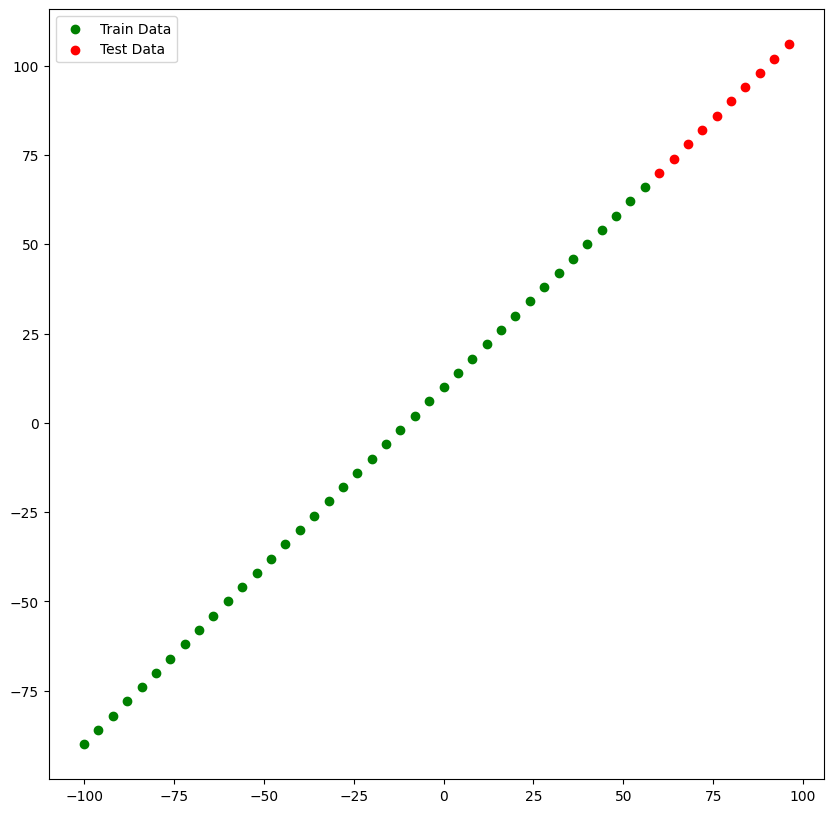

In [27]:
# Visualisasikan dengan matplotlib data train dan data test
plt.figure(figsize=(10,10))
plt.scatter(X_train,y_train,c='g')
plt.scatter(X_test,y_test,c='r')
plt.legend(["Train Data","Test Data"])

In [28]:
# Membuat Model dengan data yang sudah di split
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),metrics="mae")
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 33.4548 - mae: 33.4548
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.4120 - mae: 11.4120
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2633 - mae: 11.2633
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 9.9193 - mae: 9.9193
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 5.9872 - mae: 5.9872
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1044 - mae: 10.1044
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 6.3806 - mae: 6.3806
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 10.2860 - mae: 10.2860
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 8.9553 - mae: 8.9553
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 4.6061 - mae: 4.6061
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

In [29]:
model.predict([100])

1/1 [==============================] - 0s 75ms/step


array([[118.09336]], dtype=float32)

In [30]:
# Mari kita visualisasikan hasil prediksi model yang telah di buat dengan membandingkan data train dan test

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 60ms/step


array([[ 74.90791 ],
       [ 79.22464 ],
       [ 83.54215 ],
       [ 87.86106 ],
       [ 92.17996 ],
       [ 96.498856],
       [100.81776 ],
       [105.13666 ],
       [109.45556 ],
       [113.774475]], dtype=float32)

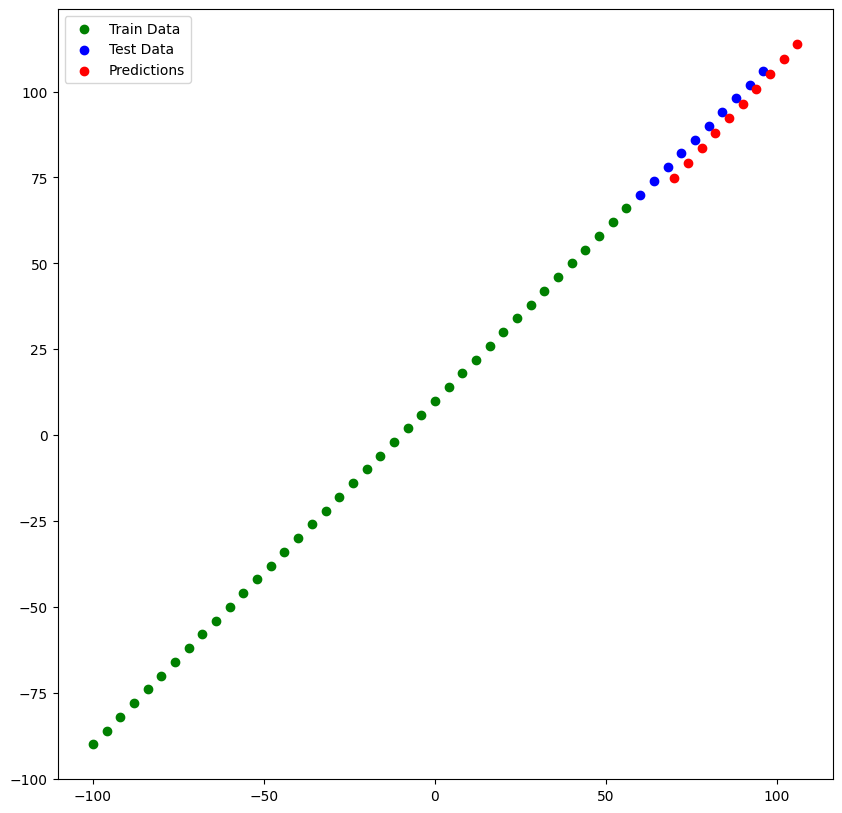

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(X_train,y_train,c='g',label="Train Data")
plt.scatter(X_test,y_test,c='b',label="Test Data")
plt.scatter(y_test,y_pred,c='r',label="Predictions")
plt.legend()

In [32]:
# Sejauh ini model yang telah di buat sepertinya hampir mendekati, namun belum terlalu baik

## Experiment membuat model dan memvisualisasikan nya dengan kondisi yang berbeda

1. model_1 -> dense 1, epochs 100
2. model_2 -> dense 128, dense 1, epochs 100
3. model_3 -> dense 128, dense 1, epochs 500
4. model_4 -> dense 128, dense 1, learning_rate = 0.02 , epochs=100

In [33]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [38]:
def make_plot(X_train,y_train,X_test,y_test,preds):
  plt.figure(figsize=(10,10))
  plt.scatter(X_train,y_train,c='r',label="Training Data")
  plt.scatter(X_test,y_test,c='g',label="Test Data")
  plt.scatter(y_test,preds,c='b',label="Prediction")
  plt.legend()

### Membuat Model 1, dengan 1 layer dan epochs 100

In [46]:
# Membuat Model 1
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss='mae',optimizer=tf.keras.optimizers.SGD(),metrics="mae")

# Tambahkan verbose 0 agar tidak menampilkan output per epochs
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100,verbose=0)

1/1 [==============================] - 0s 52ms/step


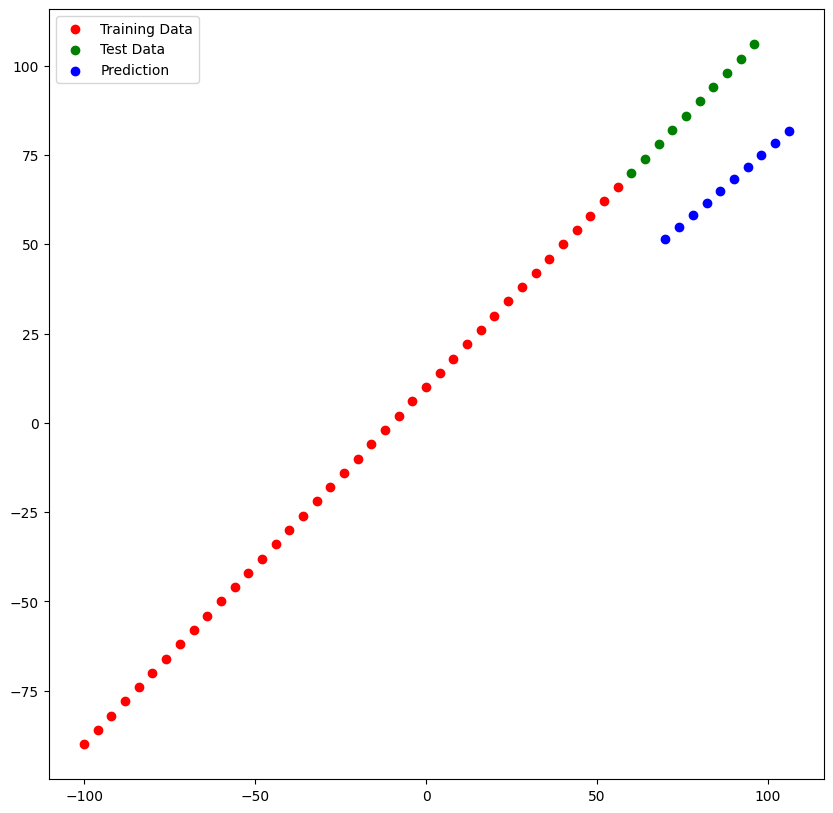

In [47]:
# Visualisasikan Model yang sudah di training dengan data test
preds_1 = model_1.predict(X_test)
make_plot(X_train,y_train,X_test,y_test,preds_1)

### Membuat Model 2, layer 1 (128) - layer 2 (1) dan epochs 100

In [48]:
# Membuat Model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss='mae',optimizer=tf.keras.optimizers.SGD(),metrics="mae")

# Tambahkan verbose 0 agar tidak menampilkan output per epochs
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100,verbose=0)

1/1 [==============================] - 0s 85ms/step


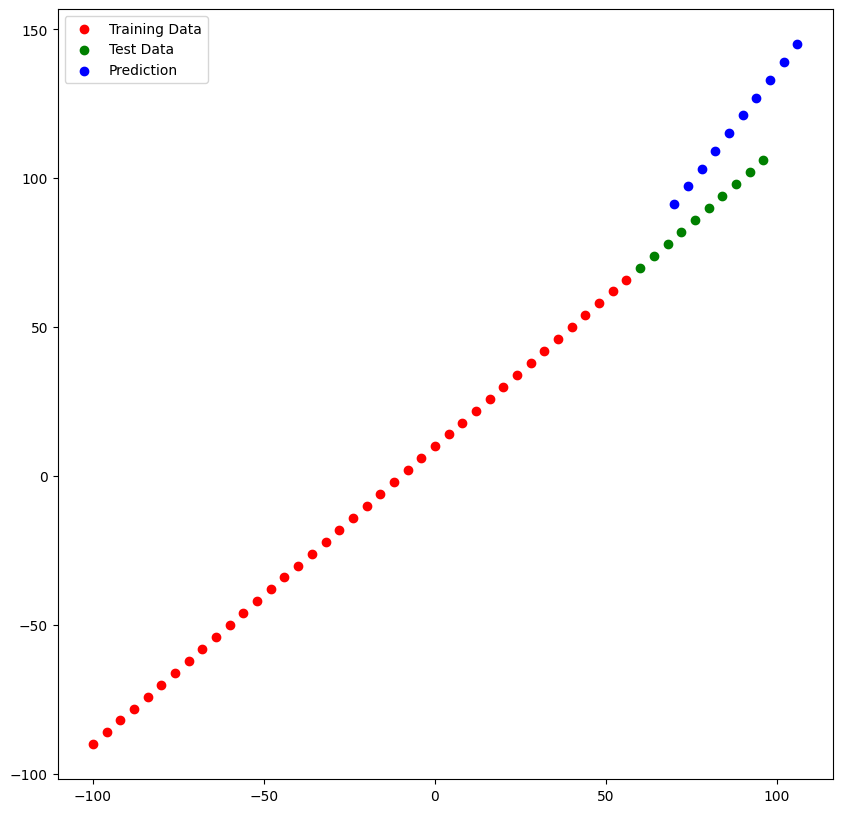

In [49]:
# Visualisasikan Model yang sudah di training dengan data test
preds_2 = model_2.predict(X_test)
make_plot(X_train,y_train,X_test,y_test,preds_2)

In [45]:
# Membuat Model 3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss='mae',optimizer=tf.keras.optimizers.SGD(),metrics="mae")

# Tambahkan verbose 0 agar tidak menampilkan output per epochs
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500,verbose=0)

1/1 [==============================] - 0s 66ms/step


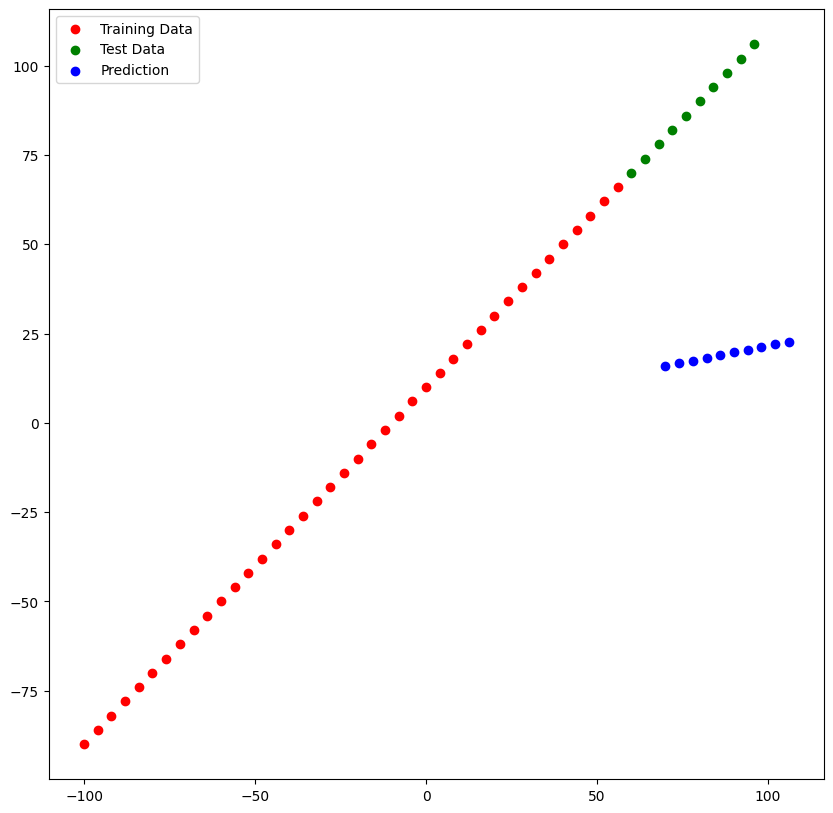

In [50]:
# Visualisasikan Model yang sudah di training dengan data test
preds_3 = model_3.predict(X_test)
make_plot(X_train,y_train,X_test,y_test,preds_3)

In [55]:
# Membuat Model 4
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss='mae',optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),metrics="mae")

# Tambahkan verbose 0 agar tidak menampilkan output per epochs
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100,verbose=0)

1/1 [==============================] - 0s 56ms/step


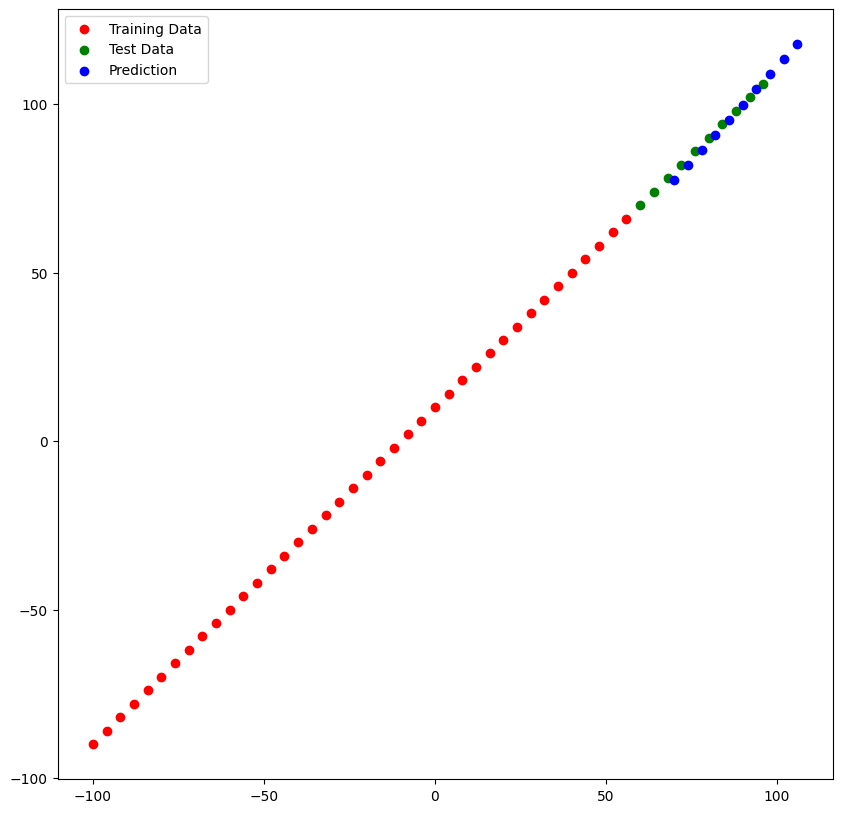

In [56]:
# Visualisasikan Model yang sudah di training dengan data test
preds_4 = model_4.predict(X_test)
make_plot(X_train,y_train,X_test,y_test,preds_4)